# Recursion

A very powerful concept in programming is *recursion*, or functions which call themselves. A simple example is the factorial function, which can be defined as:

$$
x_n = 
\begin{cases}
1          &\text{if }n = 0 \\
n x_{n-1}, &\text{if }n > 0
\end{cases}
$$

Note that:

- There is a *base case*, $n=0$, which defines the output directly
- For higher $n$, the output is defined *in terms of lower values*

This can be implemented in a Julia function using an if-statement and a call to the function itself:

In [1]:
function recursive_factorial(n)
    if n == 0
        return 1
    else
        return n*recursive_factorial(n-1)
    end
end

recursive_factorial (generic function with 1 method)

In [2]:
recursive_factorial(7)

5040

Note the way this will be evaluated in Julia: Eventually it will call the function with $n=0$ which will return 1, this will be multiplied by 2, etc, and last it will multiply by 7. This can be demonstrated by printing additional information:

In [3]:
function recursive_factorial_info(n)
    if n == 0
        println("n == 0, returning 1")
        return 1
    else
        println("n == ", n, ", calling itself with parameter ", n-1)
        output = n*recursive_factorial_info(n-1)
        println("n == ", n, ", finished calling itself, multiplying and returning ", n, "! = ", output)
        return output
    end
end

recursive_factorial_info (generic function with 1 method)

In [4]:
recursive_factorial_info(7)

n == 7, calling itself with parameter 6
n == 6, calling itself with parameter 5
n == 5, calling itself with parameter 4
n == 4, calling itself with parameter 3
n == 3, calling itself with parameter 2
n == 2, calling itself with parameter 1
n == 1, calling itself with parameter 0
n == 0, returning 1
n == 1, finished calling itself, multiplying and returning 1! = 1
n == 2, finished calling itself, multiplying and returning 2! = 2
n == 3, finished calling itself, multiplying and returning 3! = 6
n == 4, finished calling itself, multiplying and returning 4! = 24
n == 5, finished calling itself, multiplying and returning 5! = 120
n == 6, finished calling itself, multiplying and returning 6! = 720
n == 7, finished calling itself, multiplying and returning 7! = 5040


5040

This example is highly hypothetical - the factorial function is easier and more efficient to implement using for-loops. But for more complex problems, recursion can be an essential tool.

## Example: The Ackermann function

Think Julia, Exercise 6-5: The Ackermann function, $A(m, n)$, is defined:

$$
\begin{equation} {A(m, n) = \begin{cases} n+1& \textrm{if}\ m = 0 \\ A(m-1, 1)& \textrm{if}\ m > 0\ \textrm{and}\ n = 0 \\ A(m-1, A(m, n-1))& \textrm{if}\ m > 0\ \textrm{and}\ n > 0. \end{cases}} \end{equation}
$$

See https://en.wikipedia.org/wiki/Ackermann_function. Write a function named `ack` that evaluates the Ackermann function. Use your function to evaluate `ack(3, 4)`, which should be 125. What happens for larger values of m and n?

This example is not an obvious for-loop like the factorial function, but very easy to implement using recursion:

In [5]:
function ack(m,n)
    if m == 0
        return n + 1
    elseif m > 0 && n == 0
        return ack(m-1,1)
    else
        return ack(m-1, ack(m,n-1))
    end
end

ack (generic function with 1 method)

In [6]:
ack(3,4)

125

Again, let's print some additional information to try to understand how the recursive function calls itself:

In [7]:
function ack_info(m,n)
    function printme()
        print("ack(", m, ",", n, "): ")
    end
    if m == 0
        output = n + 1
        printme()
        println("Case 1: returning n + 1 = ", output)
        return output
    elseif m > 0 && n == 0
        printme()
        println("Case 2: calling itself with parameters m-1,1 == ", m-1, ",", 1)
        output = ack_info(m-1,1)
        printme()
        println("Case 2: finished calling itself, returning with output ", output)
        return output
    else
        printme()
        println("Case 3: calling itself for new n-value with parameters m,n-1 == ", m, ",", n-1)
        newn = ack_info(m,n-1)
        printme()
        println("Case 3: finished calling itself for new n-value == ", newn)
        printme()
        println("Case 3: calling itself with parameters m-1, A(m,n-1) == ", m-1, ",", newn)
        output = ack_info(m-1,newn)
        printme()
        println("Case 3: finished calling itself, returning ", output)
        return output
    end
end

ack_info (generic function with 1 method)

In [8]:
ack_info(2,1)

ack(2,1): Case 3: calling itself for new n-value with parameters m,n-1 == 2,0
ack(2,0): Case 2: calling itself with parameters m-1,1 == 1,1
ack(1,1): Case 3: calling itself for new n-value with parameters m,n-1 == 1,0
ack(1,0): Case 2: calling itself with parameters m-1,1 == 0,1
ack(0,1): Case 1: returning n + 1 = 2
ack(1,0): Case 2: finished calling itself, returning with output 2
ack(1,1): Case 3: finished calling itself for new n-value == 2
ack(1,1): Case 3: calling itself with parameters m-1, A(m,n-1) == 0,2
ack(0,2): Case 1: returning n + 1 = 3
ack(1,1): Case 3: finished calling itself, returning 3
ack(2,0): Case 2: finished calling itself, returning with output 3
ack(2,1): Case 3: finished calling itself for new n-value == 3
ack(2,1): Case 3: calling itself with parameters m-1, A(m,n-1) == 1,3
ack(1,3): Case 3: calling itself for new n-value with parameters m,n-1 == 1,2
ack(1,2): Case 3: calling itself for new n-value with parameters m,n-1 == 1,1
ack(1,1): Case 3: calling itself 

5

This also shows that the function calls itself for the same parameter values many times, suggesting that this could be done more efficiently by storing values that have already been computed.

## Example: The Greatest Common Divisor (GCD)

Think Julia, Exercise 6-8: The greatest common divisor (GCD) of $a$ and $b$ is the largest number that divides both of them with no remainder.

One way to find the GCD of two numbers is based on the observation that if $r$ is the remainder when $a$ is divided by $b$, then `gcd(a, b) = gcd(b, r)`. As a base case, we can use `gcd(a, 0) = a`.

In [9]:
function my_gcd(a,b)
    if a == 0
        return b
    elseif b == 0
        return a
    else
        return my_gcd(b, a % b)
    end
end

my_gcd (generic function with 1 method)

In [10]:
factor = 123_456_789
prime1 = 67_867_979
prime2 = 86_028_121
my_gcd(prime1*factor, prime2*factor)

123456789

## Example: Recursive triangles

Consider the shape obtained by the following algorithm:
```
    if the triangle is big enough
        Connect the midpoints.
        Color the interior triangle mauve.
        Draw smaller versions of the same shape in each of the 3 remaining interior triangles
    else
        Color the whole triangle yellow.
    end
```

We implement it as follows. "Big enough" is determined by keeping track of the level (depth) of recursion.

In [11]:
using PyPlot

function drawTriangle(x, y, level)
    # Draw recursively colored triangles.
    # x,y are 3-vectors that define the vertices of a triangle.
    
    if level == 0
        # Recursion limit (depth) reached
        fill(x, y, "y") # Color whole triangle yellow
    else
        # Draw the triangle...
        plot(x[[1,2,3,1]], y[[1,2,3,1]], "k", linewidth=0.5)
        # Determine the midpoints...
        a = (x + x[[2,3,1]]) / 2
        b = (y + y[[2,3,1]]) / 2
        # Draw and color the interior triangle mauve
        fill(a, b, "m")
        # Apply the process to the three "corner" triangles...
        newx = [x a a[[3,1,2]]]
        newy = [y b b[[3,1,2]]]
        for i = 1:3
            drawTriangle(newx[i,:], newy[i,:], level - 1)
        end
    end
end

drawTriangle (generic function with 1 method)

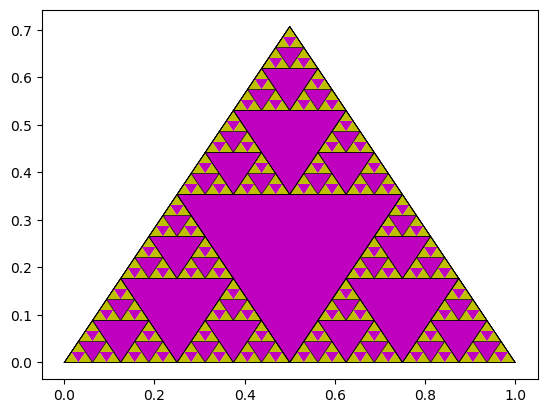

In [12]:
# Equilateral triangle
x = [0, 1, 0.5]
y = [0, 0, 1/sqrt(2)]

drawTriangle(x, y, 5)

## Mergesort

Merge Sort is a so-called Divide and Conquer algorithm. It divides an input array into two halves, calls itself for these two halves and then merges the two sorted halves. The method is illustrated below, for a simple test case with 7 elements:
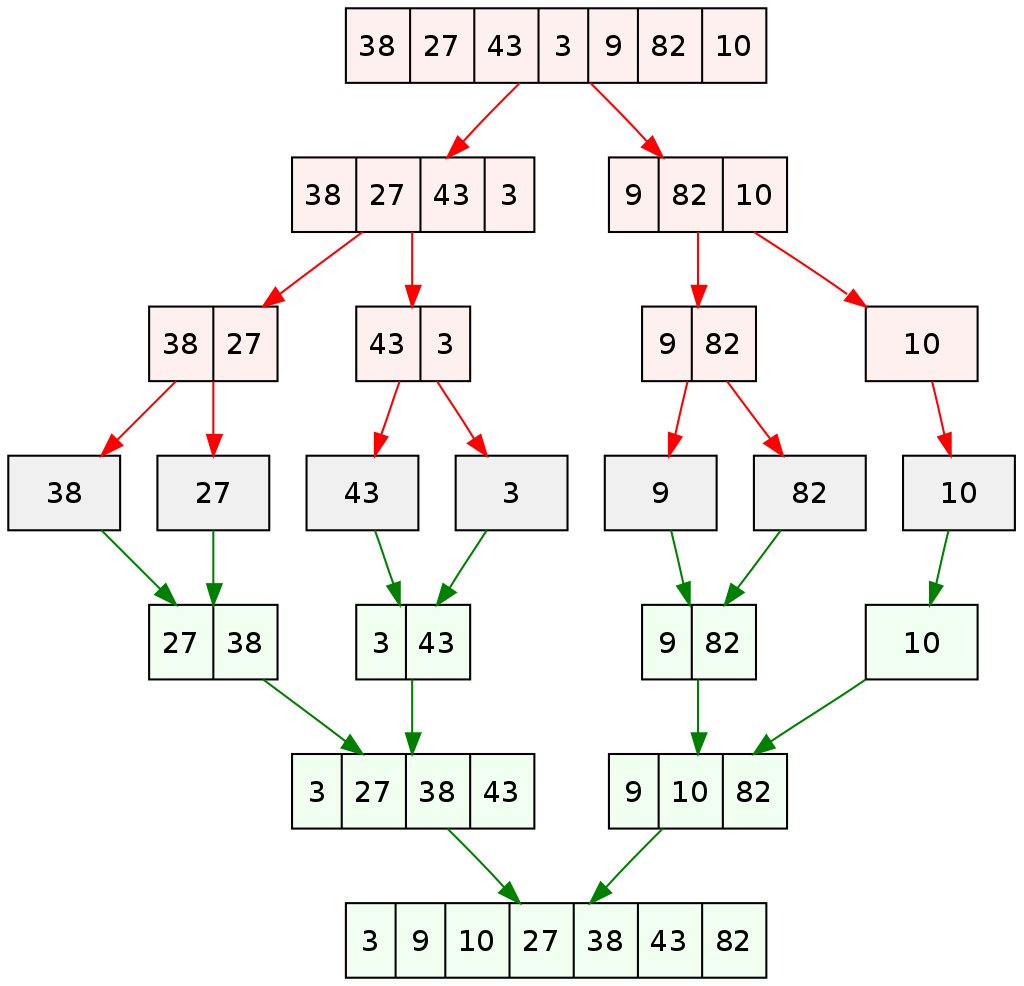
(from <https://en.wikipedia.org/wiki/Merge_sort>)

In our implementation, the `mergeLR!(L, R, x)` function is used for merging two halves. It assumes that the arrays `L` and `R` are sorted, and merges them into one:

In [13]:
function mergeLR!(L, R, x)
    # Merge the *already sorted arrays* L and R into a sorted array x
    i = j = k = 1
        
    # Merge L and R into x
    while i <= length(L) && j <= length(R)
        if L[i] < R[j]
            x[k] = L[i]
            i += 1
        else
            x[k] = R[j]
            j += 1
        end
        k += 1
    end

    # Copy remaining elements
    while i <= length(L)
        x[k] = L[i]
        i += 1
        k += 1
    end
    while j <= length(R)
        x[k] = R[j]
        j += 1
        k += 1
    end
end

mergeLR! (generic function with 1 method)

This can now be used to recursively split the array into two approximately equal-sized arrays until they have length 1, and then apply the `mergeLR!` function at each level:

In [14]:
function mergesort!(x)
    # Sort the elements of the array x using the Mergesort algorithm
    if length(x) <= 1
        return x
    else
        mid = length(x) ÷ 2   # Find the midpoint of the array
        L = x[1:mid]          # Divide array into 2 halves
        R = x[mid+1:end]

        mergesort!(L)         # Sort first half
        mergesort!(R)         # Sort second half
        
        mergeLR!(L, R, x)
    end
end

mergesort! (generic function with 1 method)

In [15]:
# Example: Sort random integers
x = rand(1:1000, 10)
println(x)
mergesort!(x)
println(x)

[171, 111, 541, 633, 723, 577, 967, 622, 721, 596]
[111, 171, 541, 577, 596, 622, 633, 721, 723, 967]


It can be shown that the number of operations needed for this algorithm to sort an array of length $n$ is about a constant times $n \log_2 n$ (which is optimal for methods based on general comparisons). We can roughly verify this using the `@time` macro which measures execution time:

In [16]:
for array_size = Int64[1e3, 1e4, 1e5, 1e6, 1e7]
    x = rand(array_size)   # Random floating point numbers
    println("n = ", array_size)
    @time mergesort!(x)
end

n = 1000
  0.042392 seconds (65.90 k allocations: 3.252 MiB)
n = 10000
  0.001917 seconds (20.00 k allocations: 2.665 MiB)
n = 100000
  0.036173 seconds (200.06 k allocations: 29.225 MiB, 34.01% gc time)
n = 1000000
  0.307931 seconds (2.00 M allocations: 314.595 MiB, 11.81% gc time)
n = 10000000
  4.452034 seconds (20.01 M allocations: 3.352 GiB, 15.49% gc time)


We can see that at least for the larger values, the execution time is a little more than 10 times larger when $n$ gets 10 times larger, showing slightly more than a linear dependency on $n$.

## Saving intermediate values in a recursion

The function below implements the so-called *McCarthy 91 function*:

$$
M(n) = 
\begin{cases}
n-10, & \text{if }n > 100 \\
M(M(n+11)), & \text{if } n \le 100
\end{cases}
$$

While trivial to implement using recursion, it is not that easy to trace the recursive calls to the function. Therefore, we define a function `Mvalues(n)` which creates an empty array `returned_values`. Inside this function we define the actual recursive function `M(n)`, and each time it is called we push the value that it returns to the `returned_values` array. Note that the order of these numbers in the array will not be the same as the order in which `M(n)` is called, since the values are pushed to the array at the end of the function.

In [17]:
function Mvalues(n)
    returned_values = Int64[]

    function M(n)
        if n > 100
            newval = n - 10
        else
            newval = M(M(n + 11))
        end
        push!(returned_values, newval)
        return newval
    end

    M(n)
    return returned_values
end

Mvalues (generic function with 1 method)

In [18]:
Mvalues(105)     # Easy - terminates immediately, M(105) = 95

1-element Array{Int64,1}:
 95

In [19]:
Mvalues(97)      # More complex - finally returns M(97) = 91

9-element Array{Int64,1}:
  98
  99
 100
 101
  91
  91
  91
  91
  91